# Exercise 1 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

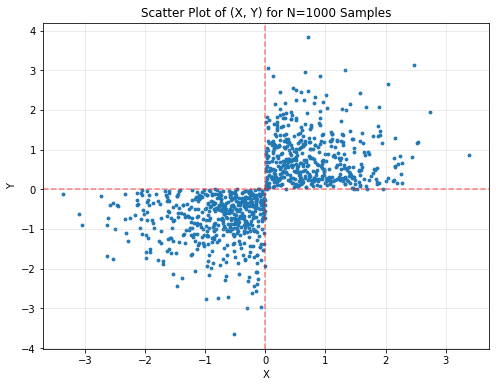

In [2]:
def generate_samples(N):
    X = np.random.randn()
    Z = np.random.randn()
    epsilon = np.where(np.sign(X) == np.sign(Z), 1, -1)
    Y = epsilon * Z 
    return X, Y 

N =1000
X = np.empty(N)
Y = np.empty(N)

for i in range(N):
    X[i], Y[i] = generate_samples(i)
    
plt.figure(figsize=(8,6))
plt.scatter(X,Y, s=8)
plt.title(f'Scatter Plot of (X, Y) for N={N} Samples')
plt.xlabel('X')
plt.ylabel('Y')
plt.axhline(y=0, color='r', linestyle='--', alpha=0.5)
plt.axvline(x=0, color='r', linestyle='--', alpha=0.5)
plt.grid(True, alpha=0.3)
plt.show()

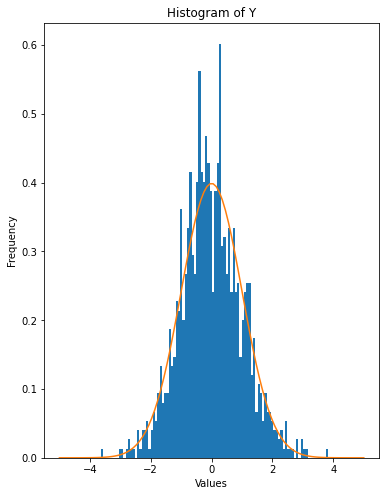

In [3]:
plt.figure(figsize=(6,8))
plt.hist(Y, bins=100, density=True)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Y')
plt.plot(np.linspace(-5,5,100), norm.pdf(np.linspace(-5,5,100), loc=0, scale=1))
plt.show()

In [4]:
print(np.corrcoef(X,Y))

[[1.         0.61843373]
 [0.61843373 1.        ]]


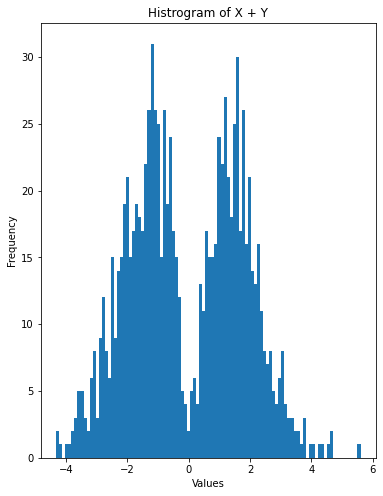

In [5]:
plt.figure(figsize=(6,8))
plt.hist(X+Y, bins=100,)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histrogram of X + Y')
plt.show()

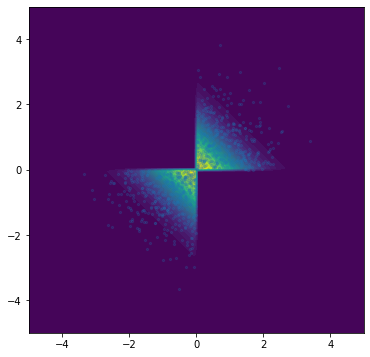

In [6]:
def f_xy(x,y):
    density = np.zeros(x.shape)
    eps = ((x > 0) * (y > 0) ) + ((x < 0) * (y < 0) )

    density[eps] = 1/np.sqrt(np.pi)*np.exp(-np.power(x[eps]+y[eps],2)/2)
    
    return density
                  
# Generate 2D grid
x1 = np.linspace(-5, 5, 100)
x2 = np.linspace(-5, 5, 100)
X1, X2 = np.meshgrid(x1, x2)

V = f_xy(X1,X2)

plt.figure(figsize=(6, 6))

plt.contourf(X1, X2, V, levels=50, cmap='viridis')
plt.scatter(X,Y,s=5,alpha=0.2)

Text(0.5, 1.0, 'Histrogram of X + Y')

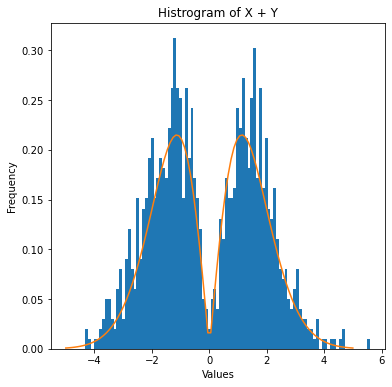

In [7]:
from scipy.stats import norm
from scipy.special import erf
def f_xplusy(z):

    return (1 / np.sqrt(2 * np.pi)) * np.exp(-z**2 / 4) * erf(np.abs(z) / np.sqrt(2))


x1 = np.linspace(-5, 5, 100)


V = f_xplusy(x1)


plt.figure(figsize=(6, 6))
plt.hist(X+Y,bins=100,density=True)
plt.plot(x1,V)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histrogram of X + Y')

# Exercise2

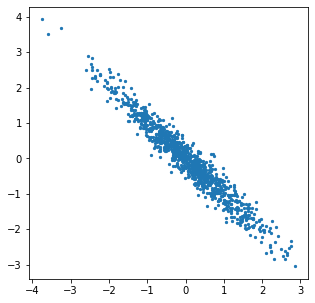

In [8]:
N = 1000

sig_noise = 0.25

X = np.random.normal(loc=0, scale=1, size=N)
noise = np.random.normal(loc=0, scale=sig_noise, size=N)
W =  -X+noise

plt.figure(figsize=(5, 5))
plt.scatter(X,W,s=5)

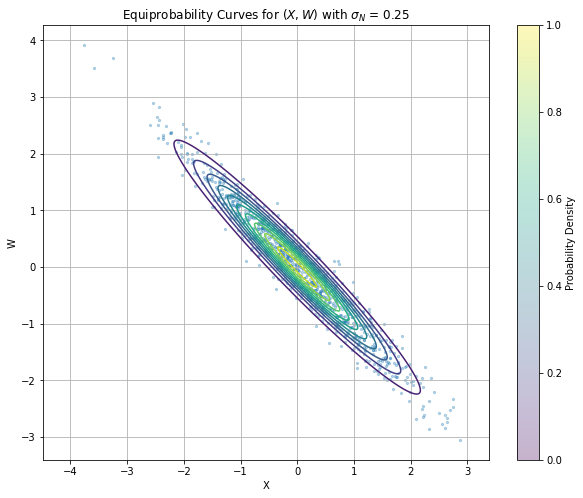

In [9]:
from scipy.stats import multivariate_normal

def plot_equiprobability_curves(X,W,sigma_N, num_points=1000, num_contours=10):
    # Define the mean vector and covariance matrix
    mean = np.array([0, 0])
    cov = np.array([[1, -1], 
                    [-1, 1 + sigma_N**2]])
    
    # Create a grid of points
    x = np.linspace(-3, 3, num_points)
    y = np.linspace(-3, 3, num_points)
    X1, X2 = np.meshgrid(x, y)
    
    # Calculate the PDF values
    pos = np.dstack((X1, X2))
    rv = multivariate_normal(mean, cov)
    Z = rv.pdf(pos)
    
    # Plot the contours
    plt.figure(figsize=(10, 8))
    plt.contour(X1, X2, Z, num_contours, cmap='viridis')
    plt.scatter(X,W,s=5,alpha=0.3)
    plt.colorbar(label='Probability Density')
    plt.xlabel('X')
    plt.ylabel('W')
    plt.title(r'Equiprobability Curves for $(X, W)$ with $\sigma_N$ = '+str(sig_noise) )
    plt.grid(True)
    plt.axis('equal')
    plt.show()

plot_equiprobability_curves(X,W,sig_noise)

In [10]:
#Relaunch several times changing sig_noise and N parameters and observe

print('Estimate using X + W : ',np.sqrt((1/(N-1))*sum(np.power(W+X - np.mean(W+X),2))))
print('Estimate using only W : ',np.sqrt((1/(N-1))*sum(np.power(W - np.mean(W),2)) - 1))

Estimate using X + W :  0.25490964224575235
Estimate using only W :  0.34751871354102926


# Exercise3

In [11]:
from scipy.stats import bernoulli

N = 1000

X = np.random.normal(loc=0, scale=1, size=N)
Z = np.random.normal(loc=0, scale=1, size=N)

eps = ((X > 0) & (Z > 0) ) + ((X < 0) & (Z < 0) )

Y = Z.copy()
Y[eps] = Z[eps]
Y[eps==False] = -Z[eps==False]

sig_noise = 0.25

noise = np.random.normal(loc=0, scale=sig_noise, size=N)
W =  -X+noise

sigY = 1
sigW = sig_noise
x = np.linspace(norm.ppf(0.01),norm.ppf(0.99), 100)

V = W.copy()
B = bernoulli.rvs(0.5, size=N)
V[B==0] = Y[B==0]

## Question 1 :

$\mathbb{P}(U) = \sum \limits_{k=1}^d \mathbb{P}(U / A = k) \mathbb{P}( A = k) = \sum \limits_{k=1}^d  \mathbb{P}( A = k) \mathbb{P}(X_k) = \sum \limits_{k=1}^d p_k f_k$



## Question 2 :
$\mathbb{E}[U] = \int \limits u \Bigl( \sum \limits_{k=1}^d p_k f_k(u)\Bigr) du =  \sum \limits_{k=1}^d p_k   \int u f_k(u) du = \sum \limits_{k=1}^d p_k \mathbb{E}[X_k]$

**Error :** Terms missing in the question:

$\rm{Var}(U) = \mathbb{E}[U^2] - \mathbb{E}[U]^2 = \sum \limits_{k=1}^d p_k \int u^2 f_k(u) du = \sum \limits_{k=1}^d p_k \mathbb{E}[X_k^2] - \mathbb{E}[U]^2 = \sum \limits_{k=1}^d p_k (\rm{Var}(X_k) + \mu_k^2) - \mathbb{E}[U]^2 = \sum \limits_{k=1}^d p_k \rm{Var}(X_k) + \sum \limits_{k=1}^d p_k \mu_k^2 - \mu^2 $

For our example, $\mu_k = 0$ and $\mu = 0$.

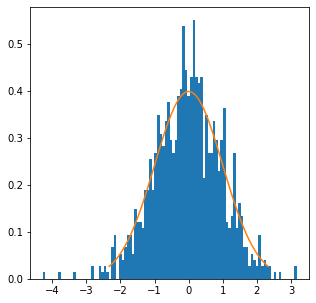

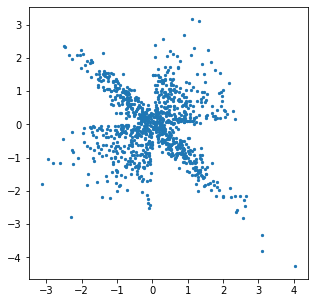

In [12]:
sigY = 1
sigW = sig_noise
x = np.linspace(norm.ppf(0.01),norm.ppf(0.99), 100)


#Density of new variable V
plt.figure(figsize=(5, 5))
plt.hist(V,bins=100,density=True)
plt.plot(x, 0.5*(norm.pdf(x,loc=0, scale=sigY) +norm.pdf(x,loc=0, scale=1) ) )

plt.figure(figsize=(5, 5))
plt.scatter(X,V,s=5)

From previous question, we know that $\mathbb{E}[V] = 0$ and $\rm{Var}(V) = \frac{1}{2}( \rm{Var}(Y) + \rm{Var}(W) ) = 1 + \frac{\sigma_N^2}{2}$

$f_V(x) = \frac{1}{2} ( f_Y(u) + f_W(u) )$ with $Y$ and $W$ both following normal distributions.

Using same technique as Q1 and Q2, with $\mu = 0$ and $\mu_k = 0$ we have $\rm{Cov}(X,V) =\frac{1}{2} (\rm{Cov}(X,Y) + \rm{Cov}(X,W)) = \frac{1}{\pi} - \frac{1}{2}$

So to get $\rm{Cov}(X,V) = 0$ we can modify $W$ to have $\rm{Cov}(X,W)=-\rm{Cov}(X,Y)=-\frac{2}{\pi}$. For example redefining $W = - \sqrt{\frac{2}{\pi}} X$.

In such case, even though we would have $\rm{Cov}(X,V) = 0$, $X$ and $V$ are not independent and do not constiture a gaussian vector.

## Question 8:

Density $f_{X,V}$ is the average of $f_{X,Y}$ and $f_{X,W}$.

Density $f_{X+V}$ is the average of $f_{X+Y}$ and $f_{X+W} = f_{noise}$.

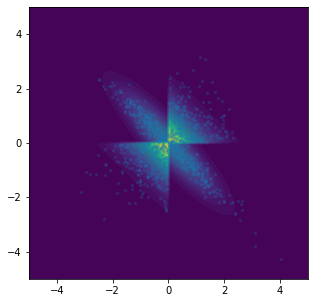

In [13]:
from scipy.stats import multivariate_normal as multn


Sigma = np.array([[1 ,-1],[-1 ,1+sig_noise]])


# Generate 2D grid
x1 = np.linspace(-5, 5, 100)
x2 = np.linspace(-5, 5, 100)
X1, X2 = np.meshgrid(x1, x2)

coor =  np.dstack((X1, X2))
values = 0.5*f_xy(X1,X2)+ 0.5*multn.pdf(coor, mean=[0,0], cov=Sigma, allow_singular=False)

plt.figure(figsize=(5, 5))
plt.contourf(X1, X2, values , levels=50, cmap='viridis')
plt.scatter(X,V,s=5,alpha=0.2)

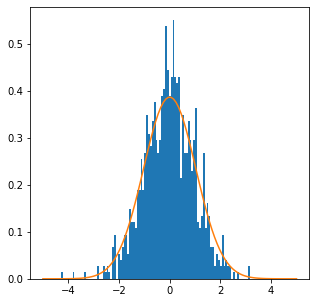

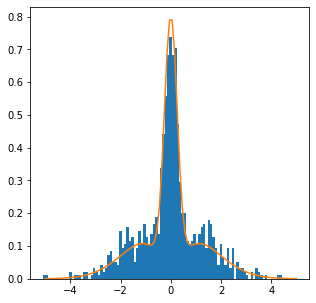

In [14]:
x1 = np.linspace(-5, 5, 100)

plt.figure(figsize=(5, 5))
plt.hist(V,bins=100,density=True)
plt.plot(x1, norm.pdf(x1,loc=0, scale=np.sqrt(1+sig_noise**2)) )

plt.figure(figsize=(5, 5))
plt.hist(X+V,bins=100,density=True)
plt.plot(x1, 0.5*(norm.pdf(x1,loc=0, scale=sig_noise) +f_xplusy(x1) ))

## Question 10

$\rm{Var}(V) =\frac{1}{2} (\rm{Var}(Y) + \rm{Var}(W)) = \frac{1}{2} ( 1 + 1+\sigma_N^2)$

Another way is to estimate empirically $\rm{Cov}(X,V) = \frac{1}{2} ( \frac{2}{\pi}+\sigma_N^2)$ and to deduce an estimator of $\sigma_N^2$.

In [15]:
from scipy.stats import chi2

# Re-generate data
N = 100000

X = np.random.normal(loc=0, scale=1, size=N)
Z = np.random.normal(loc=0, scale=1, size=N)

eps = ((X > 0) & (Z > 0) ) + ((X < 0) & (Z < 0) )

Y = Z.copy()
Y[eps] = Z[eps]
Y[eps==False] = -Z[eps==False]

sig_noise = 0.25

noise = np.random.normal(loc=0, scale=sig_noise, size=N)
W =  -X+noise

sigY = 1
sigW = sig_noise
x = np.linspace(norm.ppf(0.01),norm.ppf(0.99), 100)

V = W.copy()
B = bernoulli.rvs(0.5, size=N)
V[B==0] = Y[B==0]

def est_var(X,alpha):
    n = X.size
    
    m = np.mean(X)
    s = np.mean(np.power(X - m,2))

    quantile_low = chi2.ppf(alpha/2, n)
    quantile_high = chi2.ppf(1-alpha/2, n)

    b_low = n*s/quantile_high
    b_high = n*s/quantile_low

    return s, (b_low,b_high)

est, (b1,b2) = est_var(V,0.01)

#Depending on N size, we can obtained inconsistent estimation while sigma_N is significantly lower than 1
print('Estimate : ',2*(est - 1) )
print('Confidence interval : ',(2*(b1-1),2*(b2-1)) )

Estimate :  0.06194623471530214
Confidence interval :  (0.03838853277583976, 0.08589626748001944)
